<a href="https://colab.research.google.com/github/iamRahulB/Pytorch-practice/blob/main/Make_datasets_compatible_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
device=("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

So from torch datasets function we can load and DataLoader we can make it iterable so it will be compatible with the models. so if we have a fooldee of images (data) then we will need to make it compatible or in format in order to load using torch DataLoader so it wil be easy to work on.

In [3]:
# lets download data in folder so we can do our task

import requests
import zipfile
import os


data_path="data"

image_path=f"{data_path}/image"

#  if image path exist then no need to create else we need to create one


os.makedirs(image_path,exist_ok=True)


In [4]:

response=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")

with open("pizza_steak_sushi.zip",'wb') as f:
    f.write(response.content)

In [5]:
with zipfile.ZipFile('pizza_steak_sushi.zip' , 'r') as zip_ref:
    zip_ref.extractall(image_path)

In [6]:
# to explore the data we need to see how our images looks like

import random
from PIL import Image

all_image_paths=[]
for root,dirs,files in os.walk(image_path):
    for file in files:
        all_image_paths.append(os.path.join(root,file))



random image path: data/image/train/pizza/68684.jpg
Image hight: 384
Image width: 512


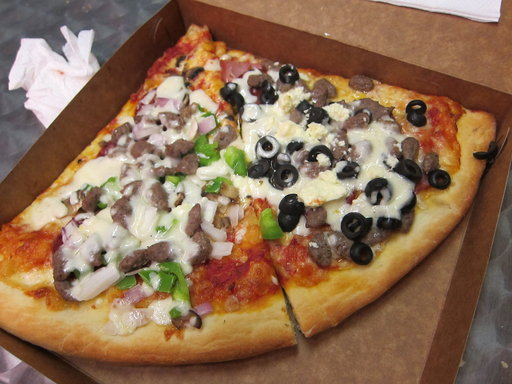

In [7]:
random_image=random.choice(all_image_paths)

print(f"random image path: {random_image}")

img=Image.open(random_image)

print(f"Image hight: {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 383.5, -0.5)

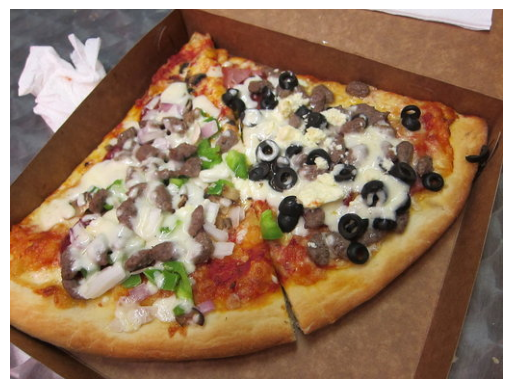

In [8]:
import numpy as np

plt.imshow(np.asarray(img))
plt.axis(False)

In [9]:
train_path=os.path.join(image_path,'train')
test_path=os.path.join(image_path,'test')


In [10]:
# train_image_paths=[]

# for root,dirs,files in os.walk(train_path):
#     for file in files:
#         print(os.path.join(root,file))

In [11]:
# transform_image=transforms.Compose([
#     transforms.Resize(size=(64,64)),
#     transforms.RandomHorizontalFlip(0.5),
#     transforms.ToTensor()
# ])



train_transform= transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


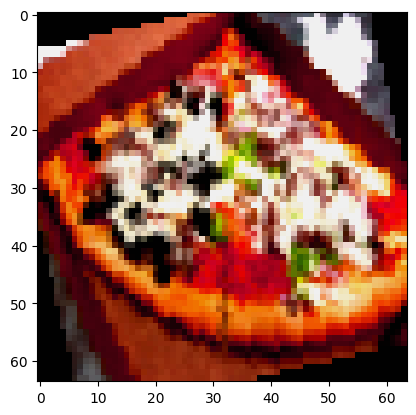

In [12]:
plt.imshow(train_transform(img).permute(1,2,0))

#  tensor converts image NCHW mean color channel first, but we need at last so matplotlib will be compatible,
#  so we can make that Tensor.permute(1,2,0) --> we kept 0 at last as we need that at last

# 4. Load data from ImageFolder Built in class of torch to load data from folder

In [13]:
train_data=datasets.ImageFolder(
    root=train_path,
    transform=train_transform,
    target_transform=None
)

test_data=datasets.ImageFolder(
    root=test_path,transform=test_transform,
    target_transform=None
)

In [14]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/image/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/image/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [15]:
train_loader=DataLoader(dataset=train_data,
           batch_size=1,
           shuffle=True,
                        num_workers=1
           )

test_loader=DataLoader(dataset=test_data,
                       shuffle=False,
                       batch_size=1,
                       num_workers=1)

In [16]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [17]:
# # THINGS TO REMEMBER

# ImageFolder -> to load data from folder but it has transfor class so we need to transform images

# transform.Compose--> to transform data

# DataLoader--> to make it iterable

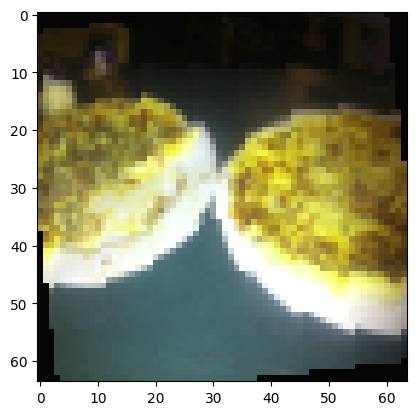

In [18]:
plt.imshow(train_data[0][0].permute(1,2,0))

#  so permute is used to reorder the diementions of the tensor so we used that.as plt requires color channel last

In [19]:
image,label=next(iter(train_loader))

image.shape,label

(torch.Size([1, 3, 64, 64]), tensor([1]))

# Can we make same loader like pytorch ?

In [20]:
class_names=os.listdir(train_path)
class_names=sorted(class_names)
print(f"class names in data:  {class_names} \n")

class_to_idx={ classes:i for classes,i in enumerate(class_names) }

print(f"Class and idx : {class_to_idx}")

class names in data:  ['pizza', 'steak', 'sushi'] 

Class and idx : {0: 'pizza', 1: 'steak', 2: 'sushi'}


# Data augmentation

 Data augmentation is a technique that uses existing data to create new data points that are similar to the original but have some variation

In [21]:
# import torchvision.transforms as transforms

# train_aug_transform = transforms.Compose([
#     transforms.Resize(size=(64, 64)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(degrees=15),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# test_transform = transforms.Compose([
#     transforms.Resize(size=(64, 64)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])


# train_aug_loader=DataLoader(dataset=train_aug_data,batch_size=1,shuffle=True)

# test_aug_loader=DataLoader(dataset=test_aug_data,batch_size=1,shuffle=False)


In [28]:
# model arch


class CNNModel(nn.Module):
    def __init__(self, input_channels, output_size):
        super().__init__()
        self.first_block = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.second_block = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=32768, out_features=128),  # Adjust based on input size

            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=128, out_features=output_size)
        )

    def forward(self, x):
        x = self.first_block(x)
        x = self.second_block(x)
        x = self.classifier(x)
        return x



In [29]:
torch.manual_seed(42)

model=CNNModel(input_channels=3,output_size=3)

model.to(device)

CNNModel(
  (first_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (second_block): Sequential(
    (0): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32768, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=3, bias=True)
  )
)

In [30]:
next(iter(train_loader))[0].shape

torch.Size([1, 3, 64, 64])

In [31]:
from torchsummary import summary

summary(model,(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
         MaxPool2d-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,992
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         MaxPool2d-8          [-1, 128, 16, 16]               0
           Flatten-9                [-1, 32768]               0
           Linear-10                  [-1, 128]       4,194,432
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                    [-1, 3]             387
Total params: 4,233,027
Trainable param

In [33]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(params=model.parameters(),lr=0.001)

epochs=20



for epoch in tqdm(range(epochs)):
    train_loss = 0
    train_acc = 0
    model.train()
    for batch, (X_train, y_train) in enumerate(train_loader):
        X_train=X_train.to(device)
        y_train=y_train.to(device)

        X_train, y_train = X_train.to(device), y_train.to(device)
        y_logits = model(X_train)
        train_batch_preds = y_logits.argmax(dim=1)
        train_batch_loss = loss_fn(y_logits, y_train)
        train_batch_acc = accuracy_score(y_train.cpu(), train_batch_preds.cpu())

        train_loss += train_batch_loss.item()
        train_acc += train_batch_acc
        optimizer.zero_grad()
        train_batch_loss.backward()
        optimizer.step()

        # if batch % 10 == 0:
        #     print(f"Train Loss: {train_batch_loss.item()} | Train ACC: {train_batch_acc}")

    model.eval()
    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X_test, y_test in test_loader:
            X_test=X_test.to(device)
            y_test=y_test.to(device)
            X_test, y_test = X_test.to(device), y_test.to(device)
            y_test_logits = model(X_test)
            test_batch_preds = y_test_logits.argmax(dim=1)
            test_batch_loss = loss_fn(y_test_logits, y_test)
            test_batch_acc = accuracy_score(y_test.cpu(), test_batch_preds.cpu())

            test_loss += test_batch_loss.item()
            test_acc += test_batch_acc

    test_loss /= len(test_loader)
    test_acc /= len(test_loader)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train ACC: {train_acc*100:.2f} | Test Loss: {test_loss:.4f} | Test ACC: {test_acc*100:.2f}")





  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.0604 | Train ACC: 51.11 | Test Loss: 1.1274 | Test ACC: 48.00
Epoch: 1 | Train Loss: 0.9775 | Train ACC: 51.56 | Test Loss: 1.6283 | Test ACC: 49.33
Epoch: 2 | Train Loss: 0.9967 | Train ACC: 47.11 | Test Loss: 2.2608 | Test ACC: 49.33
Epoch: 3 | Train Loss: 0.9291 | Train ACC: 56.44 | Test Loss: 2.3546 | Test ACC: 50.67
Epoch: 4 | Train Loss: 1.0122 | Train ACC: 45.78 | Test Loss: 1.3749 | Test ACC: 48.00
Epoch: 5 | Train Loss: 0.9364 | Train ACC: 49.78 | Test Loss: 6.8179 | Test ACC: 44.00
Epoch: 6 | Train Loss: 1.0789 | Train ACC: 47.56 | Test Loss: 1.8169 | Test ACC: 46.67
Epoch: 7 | Train Loss: 1.0022 | Train ACC: 45.78 | Test Loss: 2.6966 | Test ACC: 49.33
Epoch: 8 | Train Loss: 0.9377 | Train ACC: 49.78 | Test Loss: 4.8390 | Test ACC: 42.67
Epoch: 9 | Train Loss: 1.1398 | Train ACC: 51.11 | Test Loss: 6.3121 | Test ACC: 41.33
Epoch: 10 | Train Loss: 1.0300 | Train ACC: 49.78 | Test Loss: 2.0589 | Test ACC: 48.00
Epoch: 11 | Train Loss: 1.0153 | Train ACC

In [36]:
check_image,label=next(iter(train_loader))

with torch.inference_mode():
    check=model(check_image.to(device))

In [37]:
check.argmax(dim=1)

tensor([2], device='cuda:0')

In [38]:
check_image.shape

torch.Size([1, 3, 64, 64])

In [39]:
#  so train image is not batched so it shape is different

print(f" train image shape :{train_data[0][0].shape}")
print(f"after adding a dim to image :{train_data[0][0].unsqueeze(dim=0).shape}")

# i did this as to test image of train data on model , but model requires shape [1, 3, 64, 64]  but image has [3, 64, 64]

 train image shape :torch.Size([3, 64, 64])
after adding a dim to image :torch.Size([1, 3, 64, 64])


In [40]:
import os
os.cpu_count()

2

In [41]:
import psutil
import os

def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 ** 2)  # in MB

print(f"Memory usage: {get_memory_usage()} MB")


Memory usage: 1094.7109375 MB
